##EDA of supply and demand factors that influence house prices

Supply and Demand factors that influence the House prices in US, for this task dataset were gathered and put together for analyzing and predicting house prices which were Quarterly data over last 20 years 01-01-2000  to 01-01-2020

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams["figure.figsize"] = (30,15)


In [4]:
insurance_rate_pc=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/BOGZ1FL075035503Q.csv')
mortgage_rate=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/MORTGAGE30US.csv')
house_price=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/MSPUS.csv')
rental_rates=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/RRVRUSQ156N.csv')
income_disposable=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/A067RO1Q156NBEA (1).csv')
fuel_price_index=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/WPU057303.csv')
HPI_SP=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/CSUSHPINSA.csv')
house_supply=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/MSACSR.csv')
emp_ratio=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/EMRATIO.csv')
bussiness_inventory_lvl=pd.read_csv('gdrive/My Drive/w/Home.LLC/HPI/TOTBUSMPCIMSA.csv')

In [5]:
insurance_rate_pc.rename(columns = {'BOGZ1FL075035503Q_PCH':'InsuranceRate_pc'}, inplace = True)
mortgage_rate.rename(columns={'MORTGAGE30US':'Mortgage_rates'},inplace = True)
house_price.rename(columns={'MSPUS':'House_price_inMIL'},inplace= True)
rental_rates.rename(columns = {'RRVRUSQ156N':'Rental_rates'},inplace = True)
income_disposable.rename(columns = {'A067RO1Q156NBEA_PCH':'Income_rates_pc'},inplace = True)
fuel_price_index.rename(columns = {'WPU057303_PCH':'Fuel_Price_Index'},inplace= True)
HPI_SP.rename(columns={'CSUSHPINSA':'House_price_index_SP'},inplace=True)
house_supply.rename(columns = {'MSACSR_PCH':'House_supply'},inplace = True)
emp_ratio.rename(columns = {'EMRATIO':'Emp_Pop_ratio'},inplace = True)
bussiness_inventory_lvl.rename(columns = {'TOTBUSMPCIMSA':'Bussiness_inventory_lvls'},inplace=True)

Factors that are goiing to be used

1. Insurance rates
2. Mortgage rates
3. Renting rates
4. Income Dispocable(Money a person can spend after cutting Income taxes)(This is choosen so that there will be no need to use factors like Income and taxes as different varibles)
5. Employment to population ratio(as name describes, it is choosen so that there wont be need to use variables like population, job growth, unemployment)
6. Fuel prices(Crude fuel, Disel price index)
7. House supply(Percentage change in supply of houses over 20 years/might also be called as market inventory level)
8. Bussiness inventory levels(Material/gooda inventory levels of various bussiness)
9. HPI_SP(SandP case schiller House price Index where year 2000 hpi is taken as 100 and proceeded)
10. Average Prices of house(in Dollars)

In [6]:
print(insurance_rate_pc.head(3))
print(mortgage_rate.head(3))

         DATE  InsuranceRate_pc
0  2000-01-01          -2.10537
1  2000-04-01          -0.83746
2  2000-07-01          10.51417
         DATE  Mortgage_rates
0  2000-01-01        8.256923
1  2000-04-01        8.316154
2  2000-07-01        8.020000


In [7]:
print(income_disposable.head(3))
print(rental_rates.head(3))

         DATE Income_rates_pc
0  2000-01-01        29.41176
1  2000-04-01        20.45455
2  2000-07-01         9.43396
         DATE  Rental_rates
0  2000-01-01           7.9
1  2000-04-01           8.0
2  2000-07-01           8.2


In [8]:
income_disposable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             81 non-null     object
 1   Income_rates_pc  81 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


Pre processing for a variable before merging
The original data form FRED contains a single missing value which if we edit externally changes date format and creates problem while merging 
all dataframes

In [9]:
income_disposable.iloc[35:36,1] = '-90'

In [10]:
income_disposable.iloc[35:36,1]

35    -90
Name: Income_rates_pc, dtype: object

Sample merging of few variables

In [11]:
fpi=fuel_price_index.copy()
rr=rental_rates.copy()
incdi=income_disposable.copy()

In [12]:
merger=pd.merge(fpi,rr)
merger=pd.merge(merger,incdi)

Sample merging successful

In [13]:
merger.head()

,DATE,Fuel_Price_Index,Rental_rates,Income_rates_pc
0,2000-01-01,18.90618,7.9,29.41176
1,2000-04-01,0.15860,8.0,20.45455
2,2000-07-01,15.75614,8.2,9.43396
3,2000-10-01,10.12312,7.8,-20.68966
4,2001-01-01,-15.34161,8.2,-21.73913


Merging all factors to perform analysis

In [14]:
House_price_prediction = pd.merge(insurance_rate_pc,mortgage_rate)
House_price_prediction = pd.merge(House_price_prediction,income_disposable)
House_price_prediction = pd.merge(House_price_prediction,house_supply)
House_price_prediction = pd.merge(House_price_prediction,rental_rates)
House_price_prediction = pd.merge(House_price_prediction,emp_ratio)
House_price_prediction = pd.merge(House_price_prediction,fuel_price_index)
House_price_prediction = pd.merge(House_price_prediction,bussiness_inventory_lvl)
House_price_prediction = pd.merge(House_price_prediction,HPI_SP)
House_price_prediction = pd.merge(House_price_prediction,house_price)

In [15]:
House_price_prediction.head()

,DATE,InsuranceRate_pc,Mortgage_rates,Income_rates_pc,House_supply,Rental_rates,Emp_Pop_ratio,Fuel_Price_Index,Bussiness_inventory_lvls,House_price_index_SP,House_price_inMIL
0,2000-01-01,-2.10537,8.256923,29.41176,0.78125,7.9,64.600000,18.90618,0.400000,100.679000,165300.0
1,2000-04-01,-0.83746,8.316154,20.45455,5.42636,8.0,64.533333,0.15860,0.700000,103.698333,163200.0
2,2000-07-01,10.51417,8.020000,9.43396,-8.08824,8.2,64.200000,15.75614,0.266667,106.458667,168800.0
3,2000-10-01,3.28275,7.620769,-20.68966,-5.60000,7.8,64.300000,10.12312,0.333333,108.268333,172900.0
4,2001-01-01,-0.67598,7.006923,-21.73913,-4.23729,8.2,64.333333,-15.34161,-0.266667,109.750000,169800.0


In [16]:
House_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      81 non-null     object 
 1   InsuranceRate_pc          81 non-null     float64
 2   Mortgage_rates            81 non-null     float64
 3   Income_rates_pc           81 non-null     object 
 4   House_supply              81 non-null     float64
 5   Rental_rates              81 non-null     float64
 6   Emp_Pop_ratio             81 non-null     float64
 7   Fuel_Price_Index          81 non-null     float64
 8   Bussiness_inventory_lvls  81 non-null     float64
 9   House_price_index_SP      81 non-null     float64
 10  House_price_inMIL         81 non-null     float64
dtypes: float64(9), object(2)
memory usage: 7.6+ KB


Changing it from object to float 

In [17]:
House_price_prediction['Income_rates_pc']=House_price_prediction['Income_rates_pc'].astype(float)

In [18]:
House_price_prediction.isnull().sum()

DATE                        0
InsuranceRate_pc            0
Mortgage_rates              0
Income_rates_pc             0
House_supply                0
Rental_rates                0
Emp_Pop_ratio               0
Fuel_Price_Index            0
Bussiness_inventory_lvls    0
House_price_index_SP        0
House_price_inMIL           0
dtype: int64

In [19]:
House_price_prediction['DATE']

0     2000-01-01
1     2000-04-01
2     2000-07-01
3     2000-10-01
4     2001-01-01
         ...    
76    2019-01-01
77    2019-04-01
78    2019-07-01
79    2019-10-01
80    2020-01-01
Name: DATE, Length: 81, dtype: object

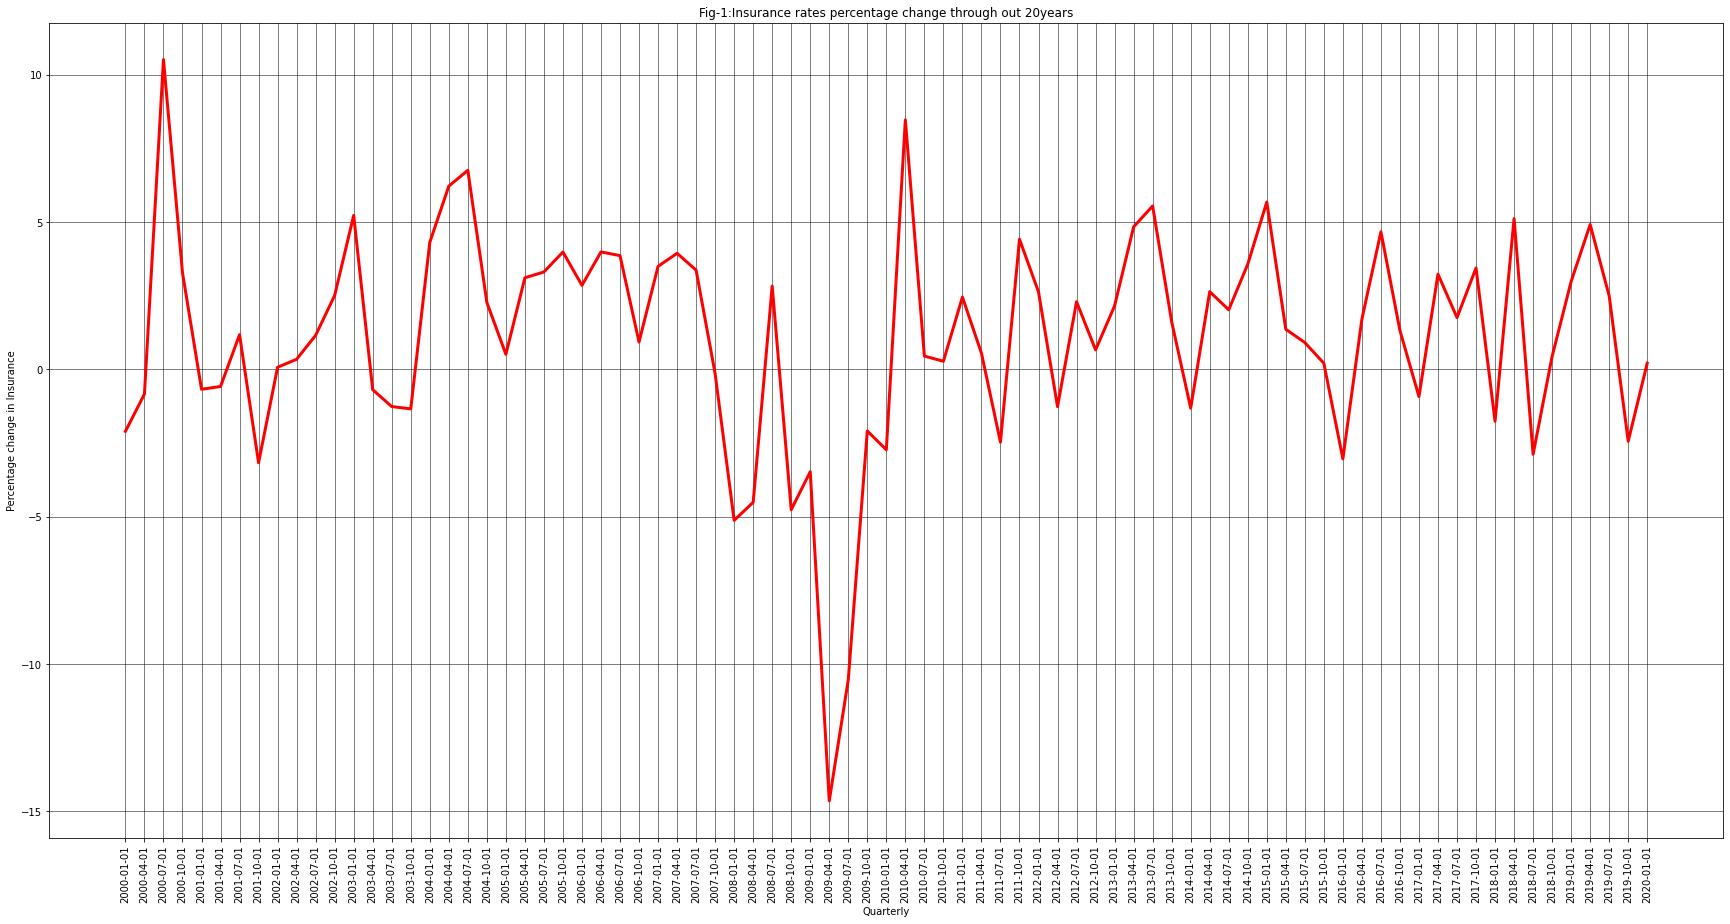

In [20]:
#Insurance rates plot
x=House_price_prediction['DATE']
y=House_price_prediction['InsuranceRate_pc']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-1:Insurance rates percentage change through out 20years', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Percentage change in Insurance')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-1  Insurance rates from the line graph, after US recession period they were incrediblly dropped.

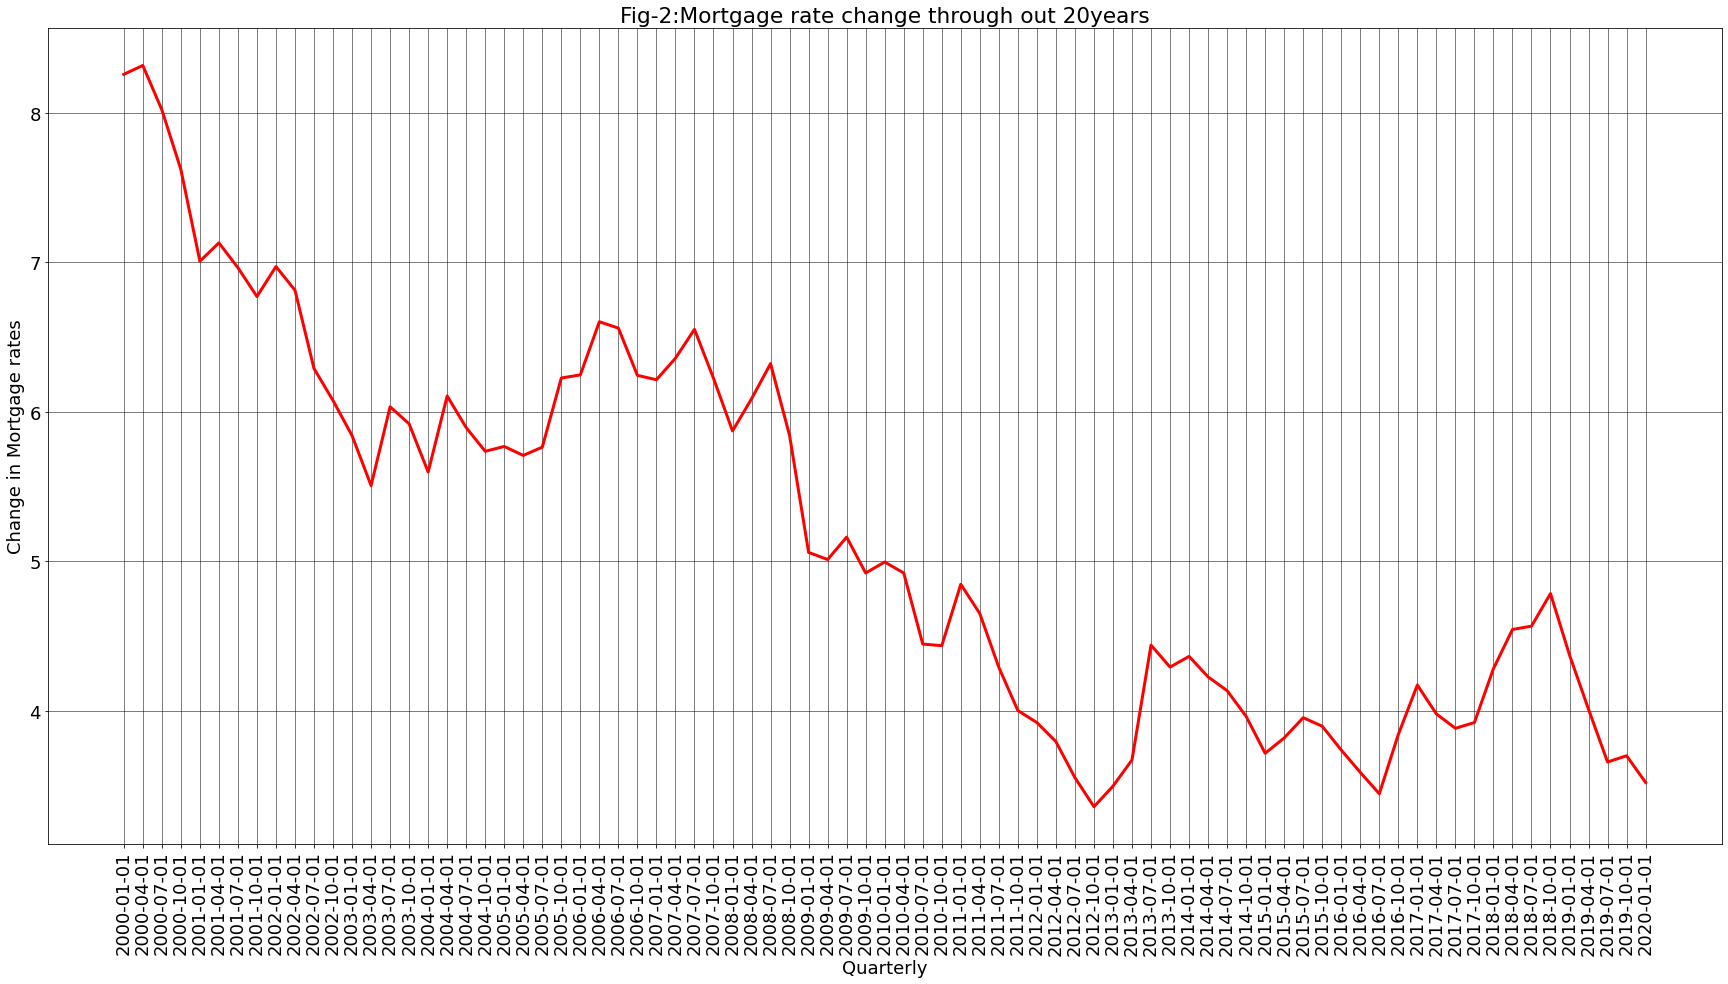

In [21]:
#Mortgage rates plot
x=House_price_prediction['DATE']
y=House_price_prediction['Mortgage_rates']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-2:Mortgage rate change through out 20years', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in Mortgage rates')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-2 Mortgage rates are getting lower and lower which lead more people to buy more houses

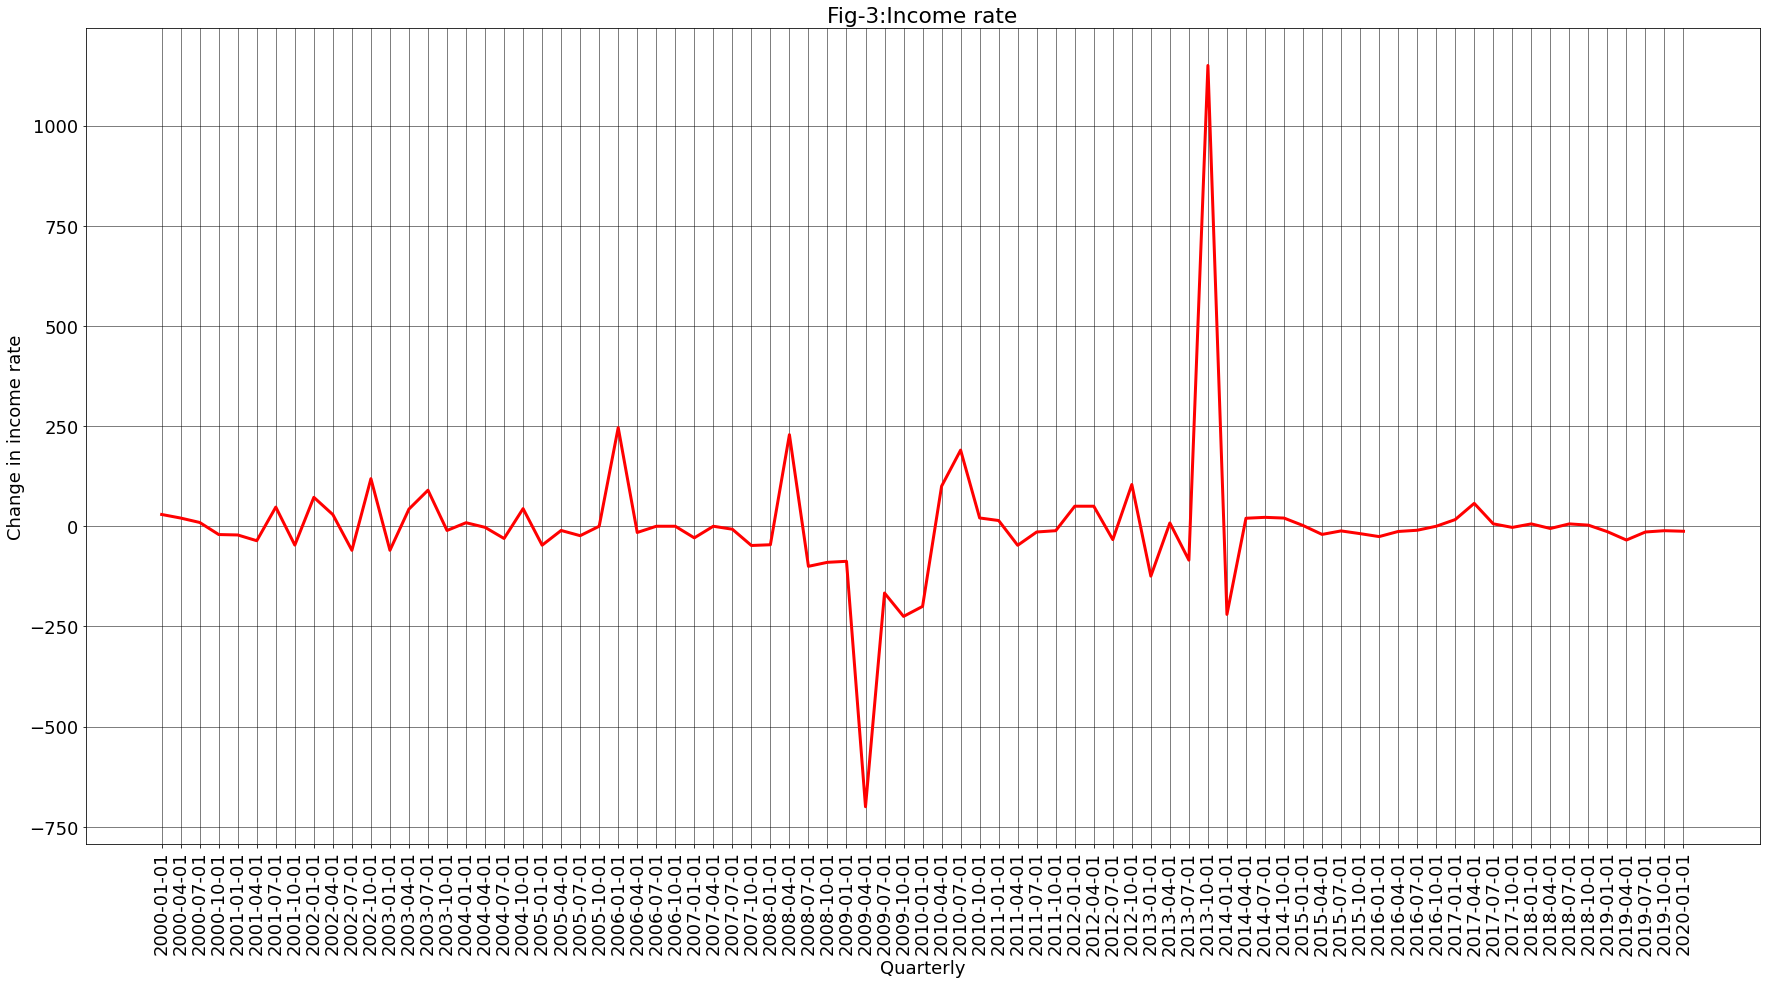

In [22]:
#Income rates
x=House_price_prediction['DATE']
y=House_price_prediction['Income_rates_pc']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-3:Income rate', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in income rate')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-3 Income rates average income rates were not changes except two periods recession period where income is dropped and during 2013-2014

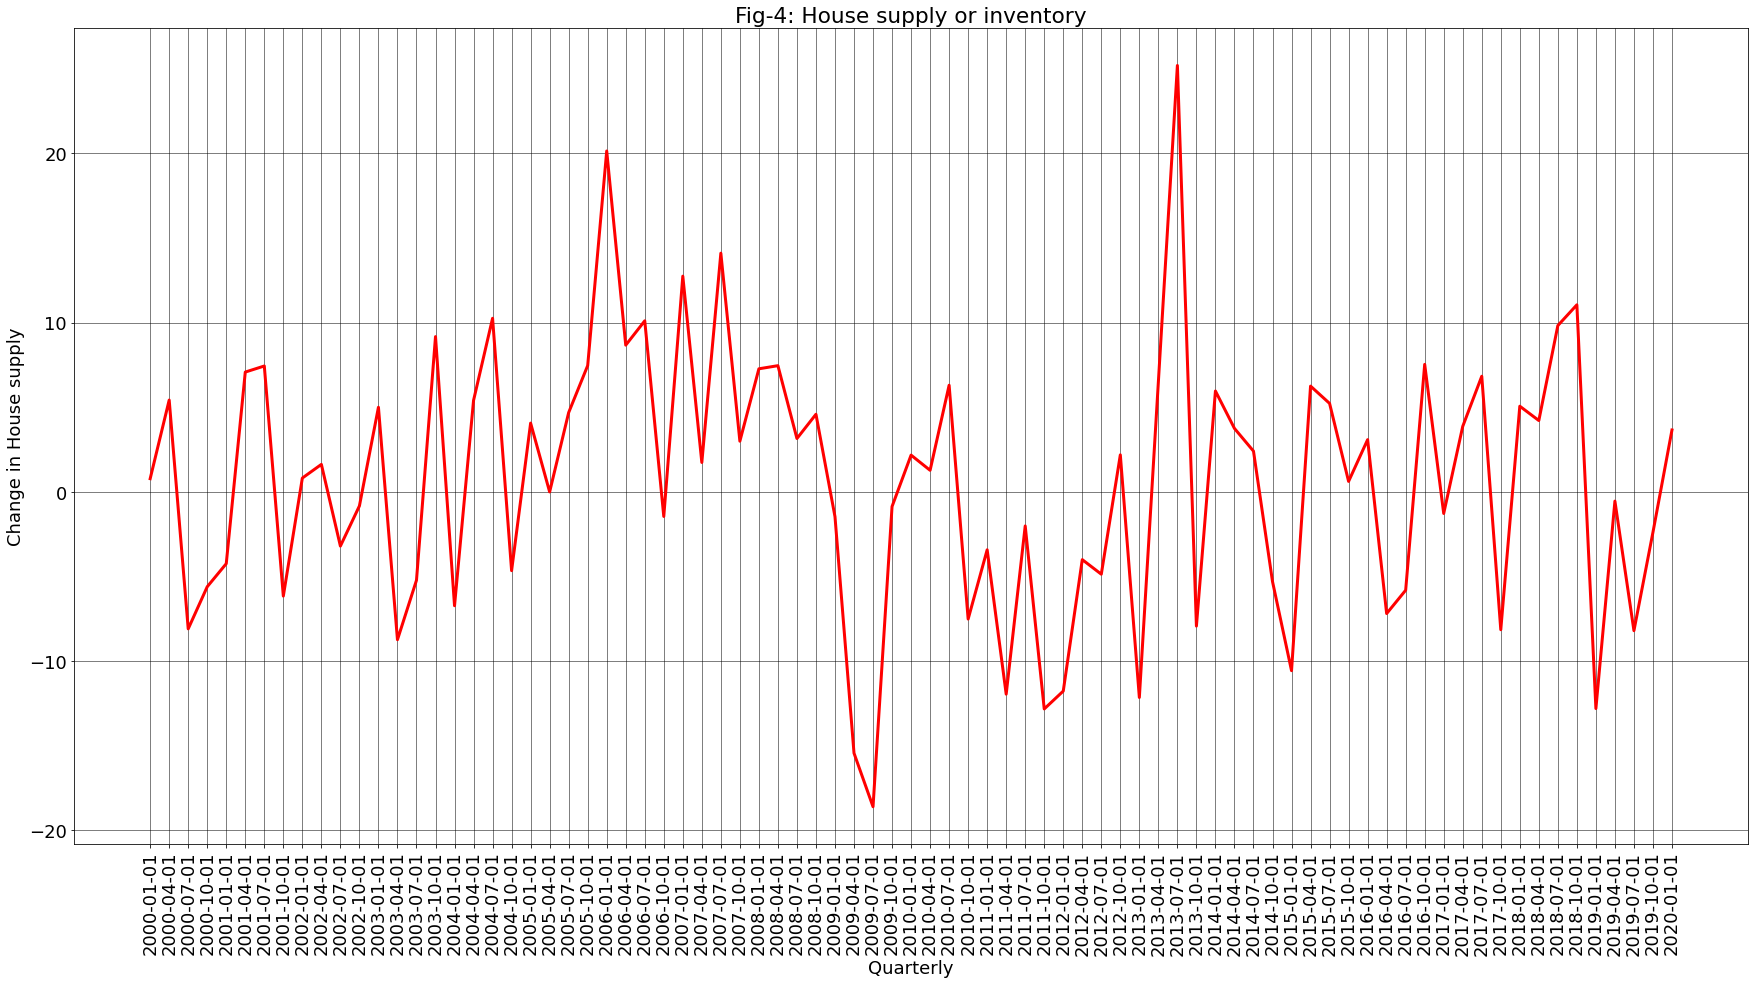

In [23]:
#House supply plot
x=House_price_prediction['DATE']
y=House_price_prediction['House_supply']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-4: House supply or inventory', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in House supply')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-4 House supply is drastically decreased and leap and bounds throughout 20years

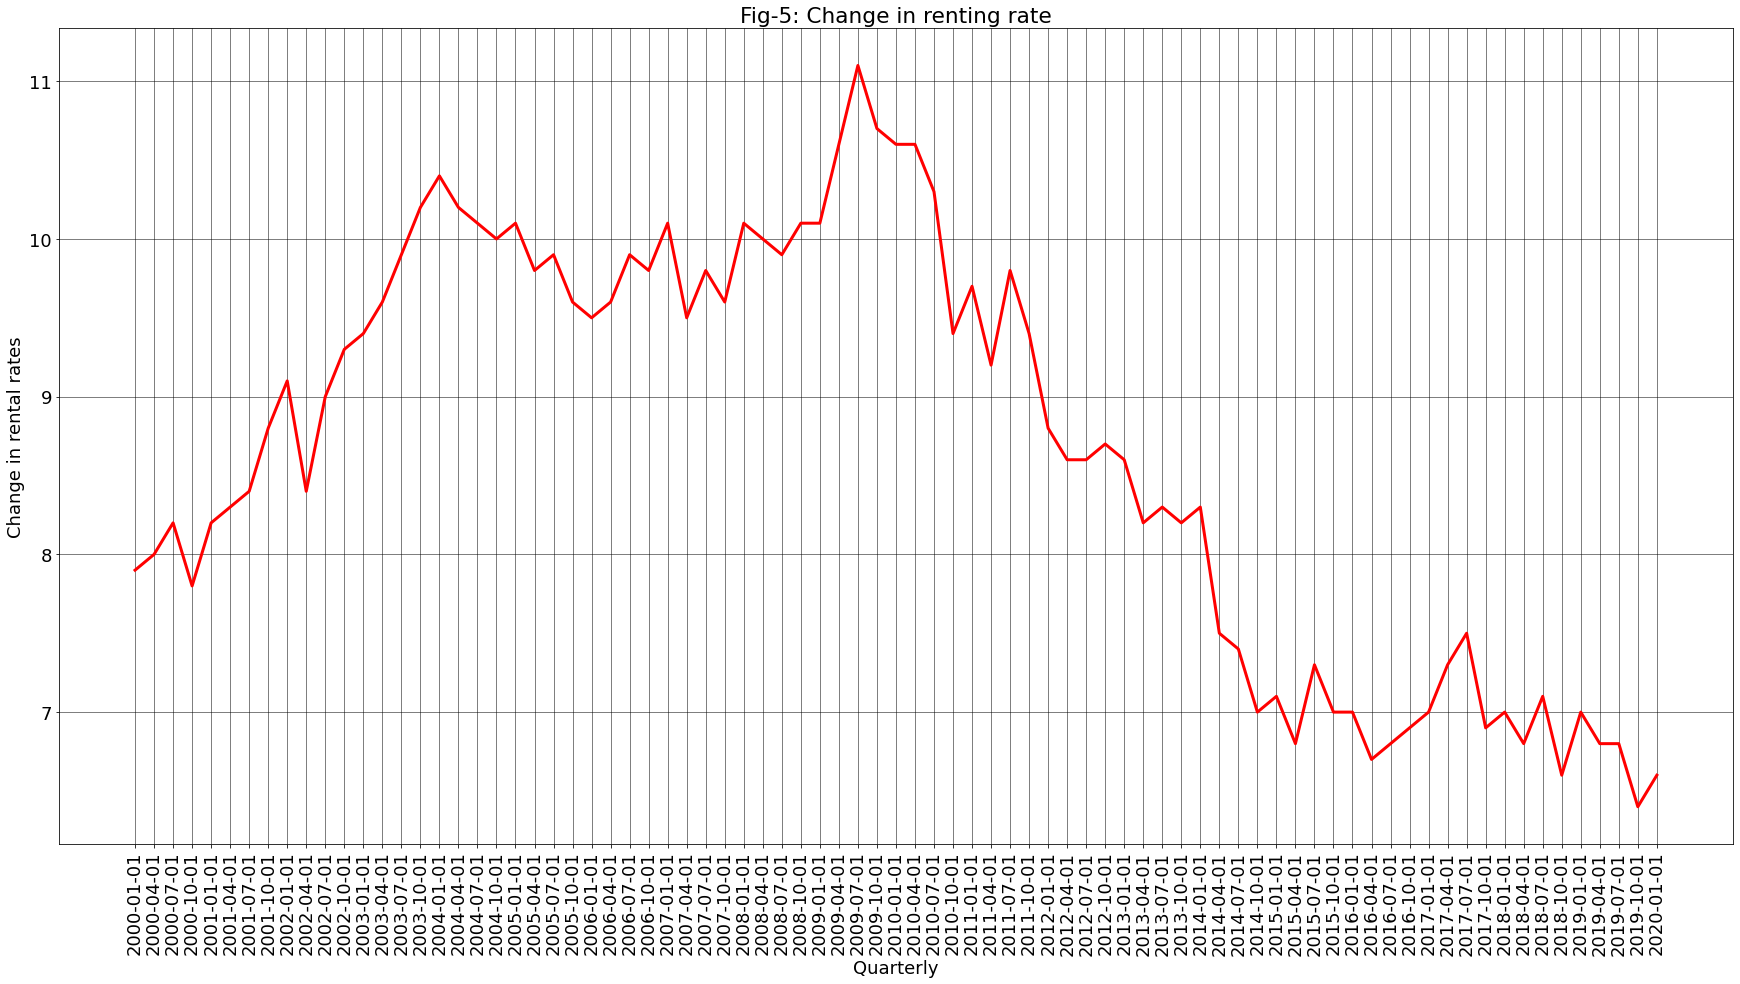

In [24]:
#rental rates plot
x=House_price_prediction['DATE']
y=House_price_prediction['Rental_rates']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-5: Change in renting rate', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in rental rates')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-5 Renting houses are been very less that means more people are buying houses rather than renting, this is closely related to mortgage rates for buying house Fig-2 similar trend is seen  

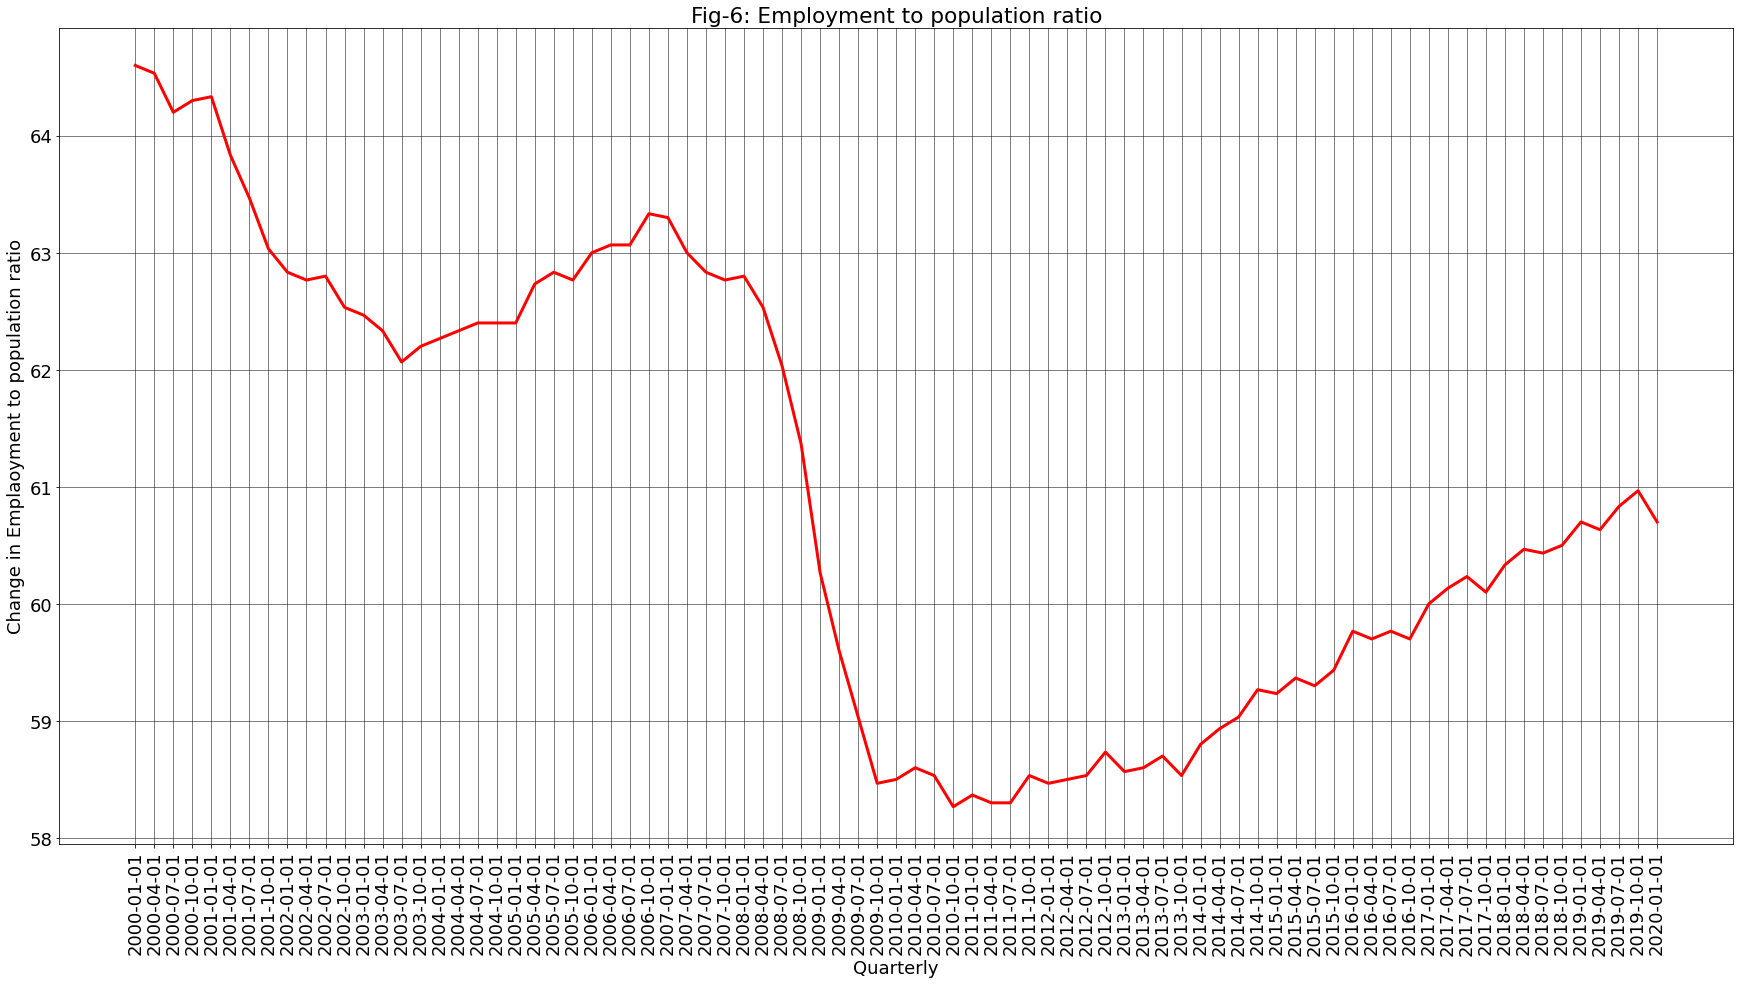

In [25]:
#Employment to population plot
x=House_price_prediction['DATE']
y=House_price_prediction['Emp_Pop_ratio']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-6: Employment to population ratio', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in Emplaoyment to population ratio')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-6 employment ration drastically down during US recession period and gradually going up.

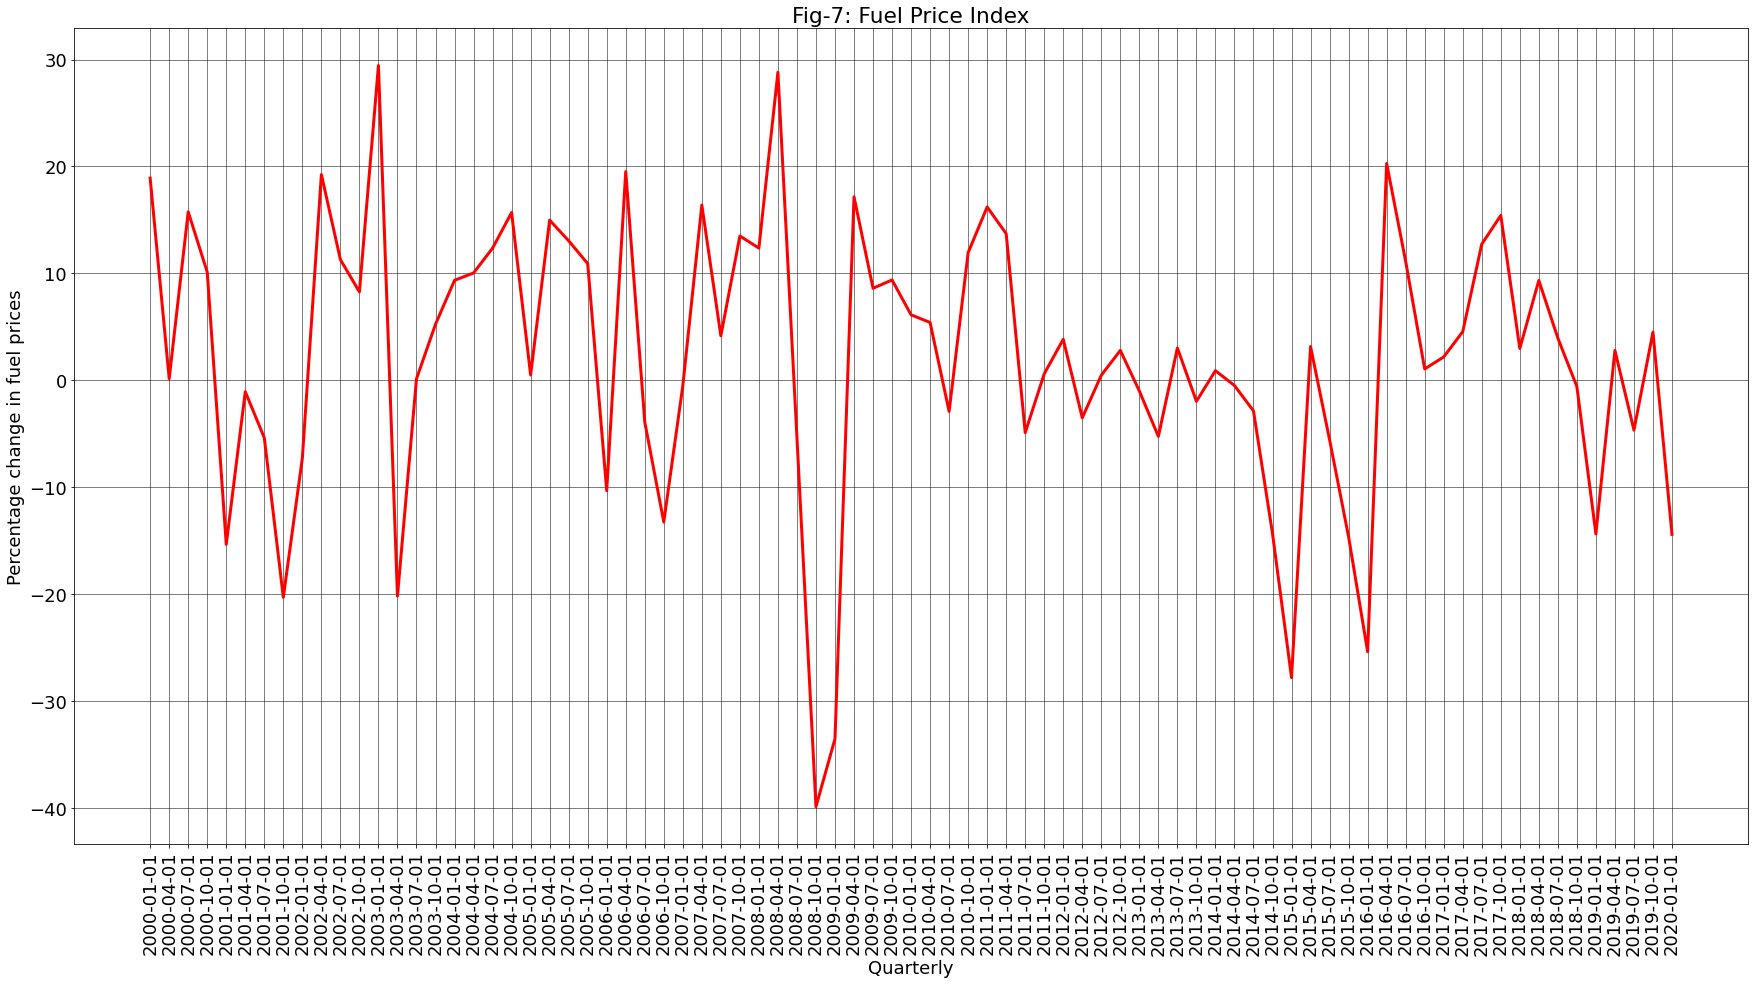

In [26]:
#Fuel price index plot
x=House_price_prediction['DATE']
y=House_price_prediction['Fuel_Price_Index']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-7: Fuel Price Index', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Percentage change in fuel prices')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-7 Percetage change in Fuel prices is down during recession period and it has leap and bounds over years

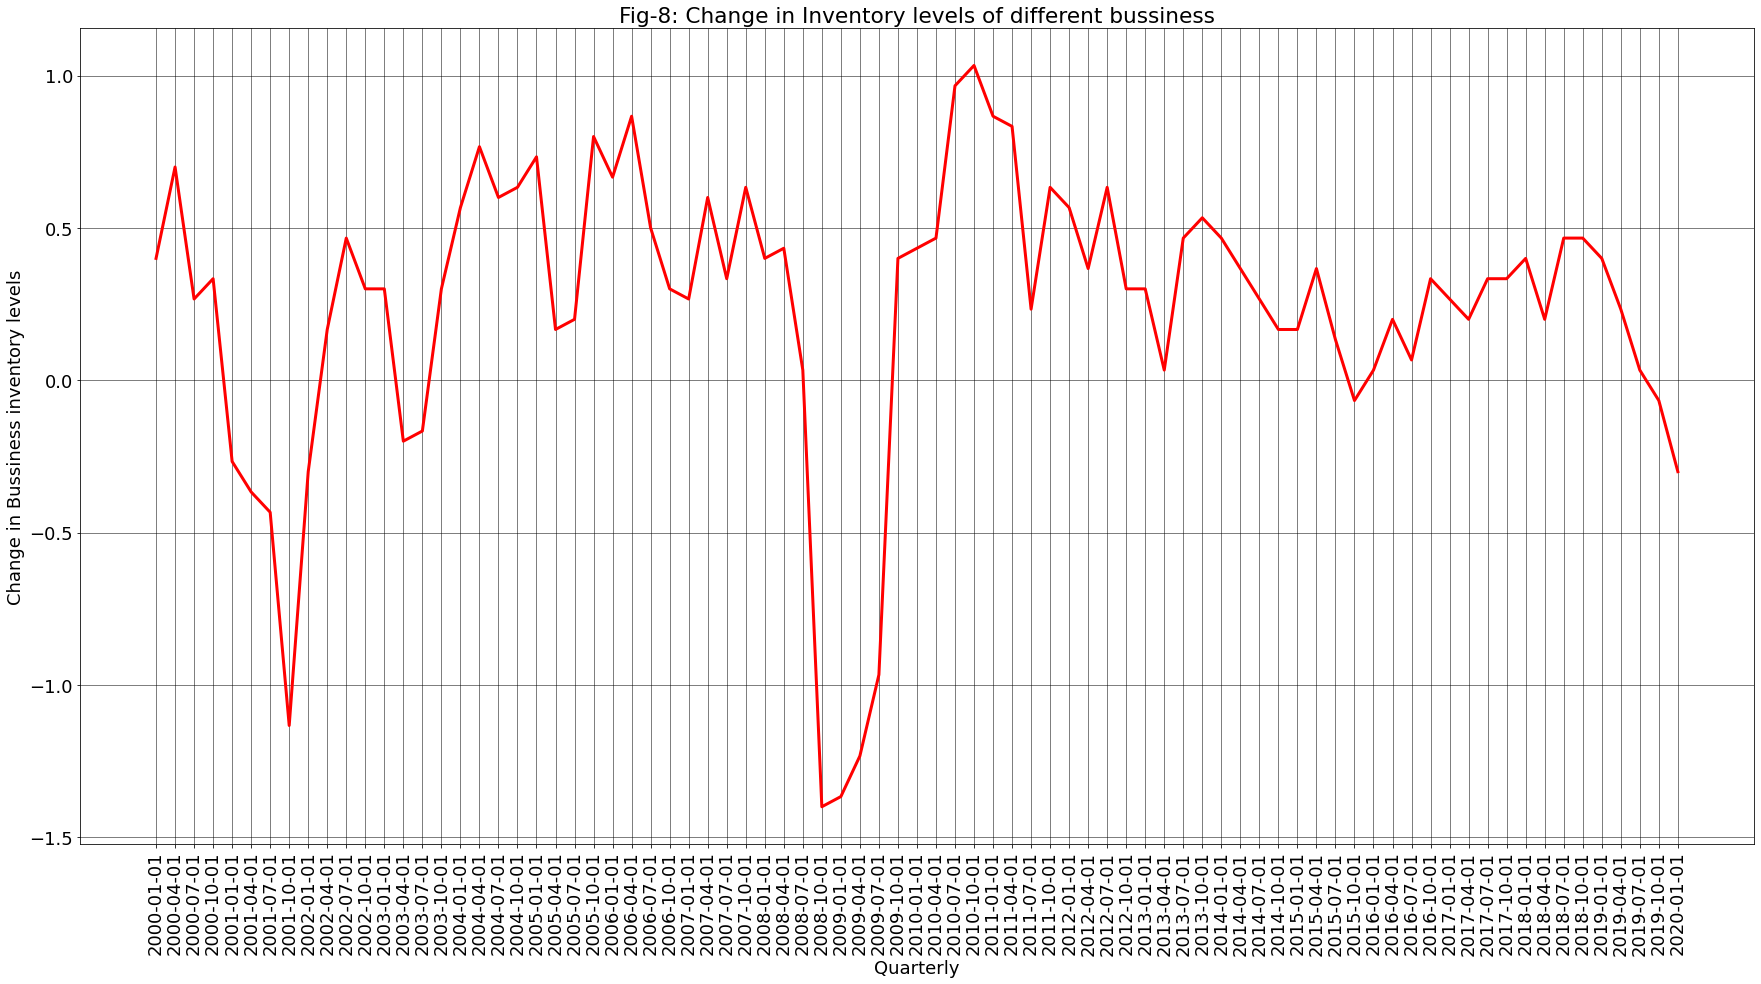

In [27]:
#Bussiness inventory levels plot
x=House_price_prediction['DATE']
y=House_price_prediction['Bussiness_inventory_lvls']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-8: Change in Inventory levels of different bussiness', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in Bussiness inventory levels')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-8 Inventory levels of material goods and other business it is low in recession period and  from its going due to pandemic 

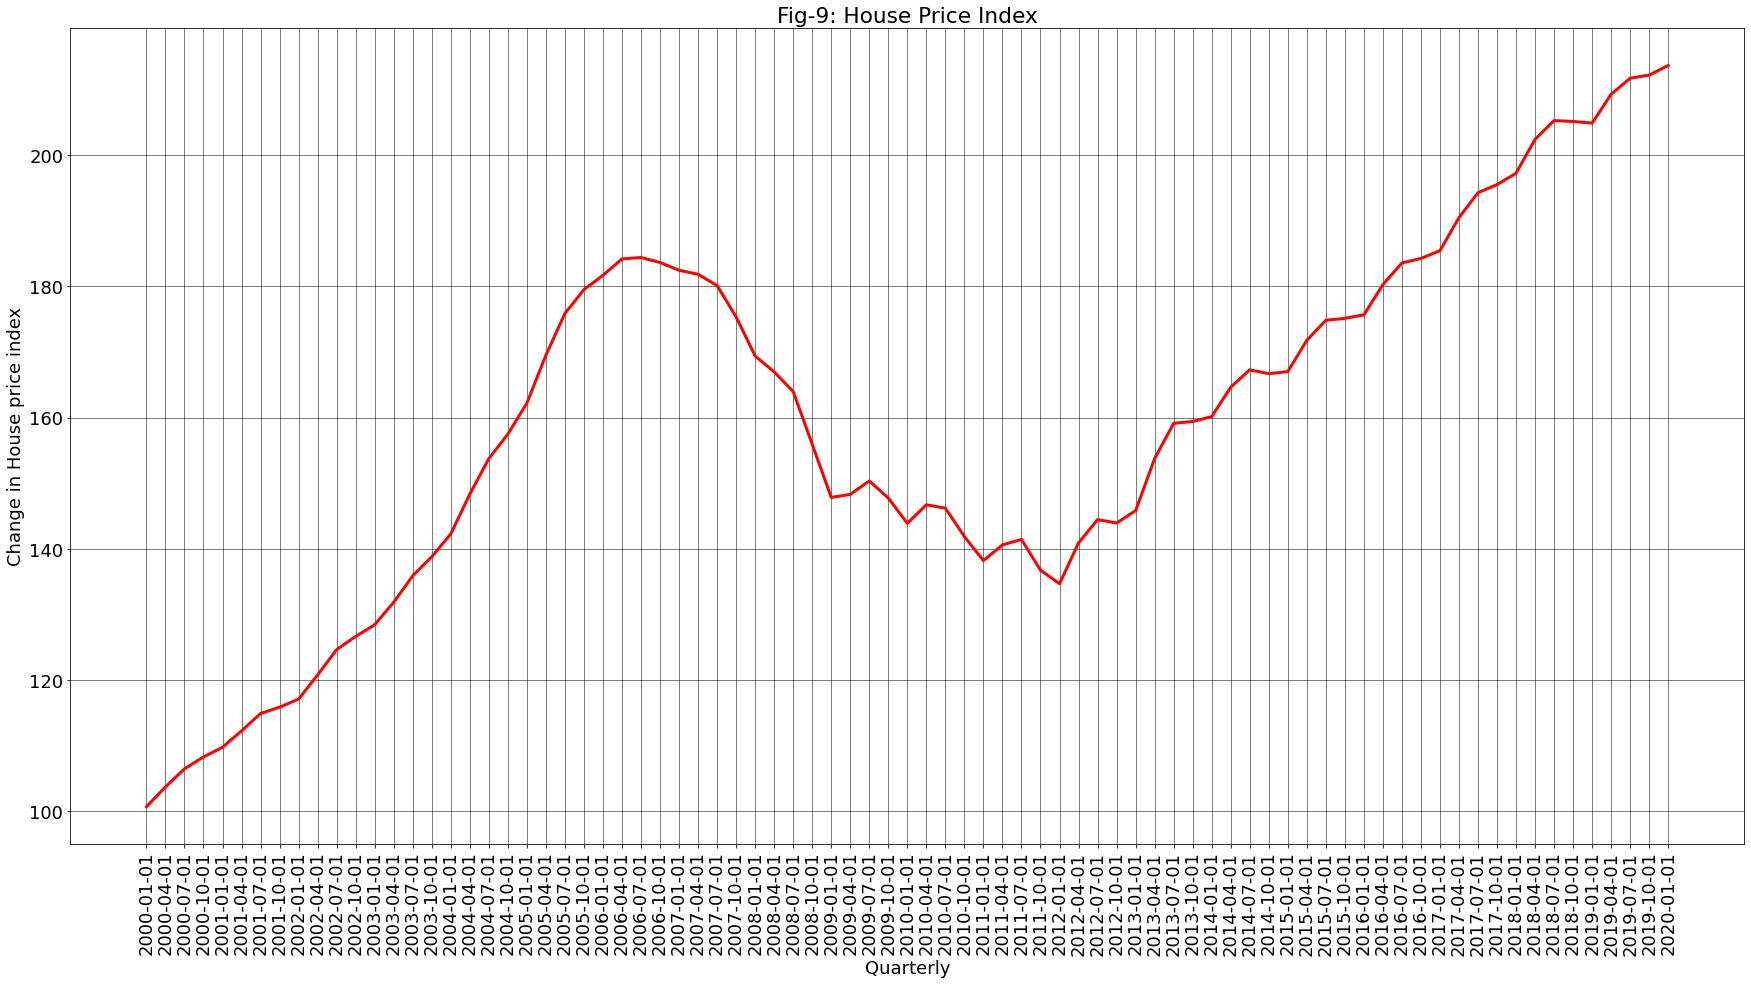

In [28]:
#HPI(house price index) plot
x=House_price_prediction['DATE']
y=House_price_prediction['House_price_index_SP']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-9: House Price Index', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('Change in House price index')
plt.xticks(rotation = 90)
#plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 18})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-9 House Price Index graph went down after recession and its been gradually increasing after that, recent years its more that double from 20years back

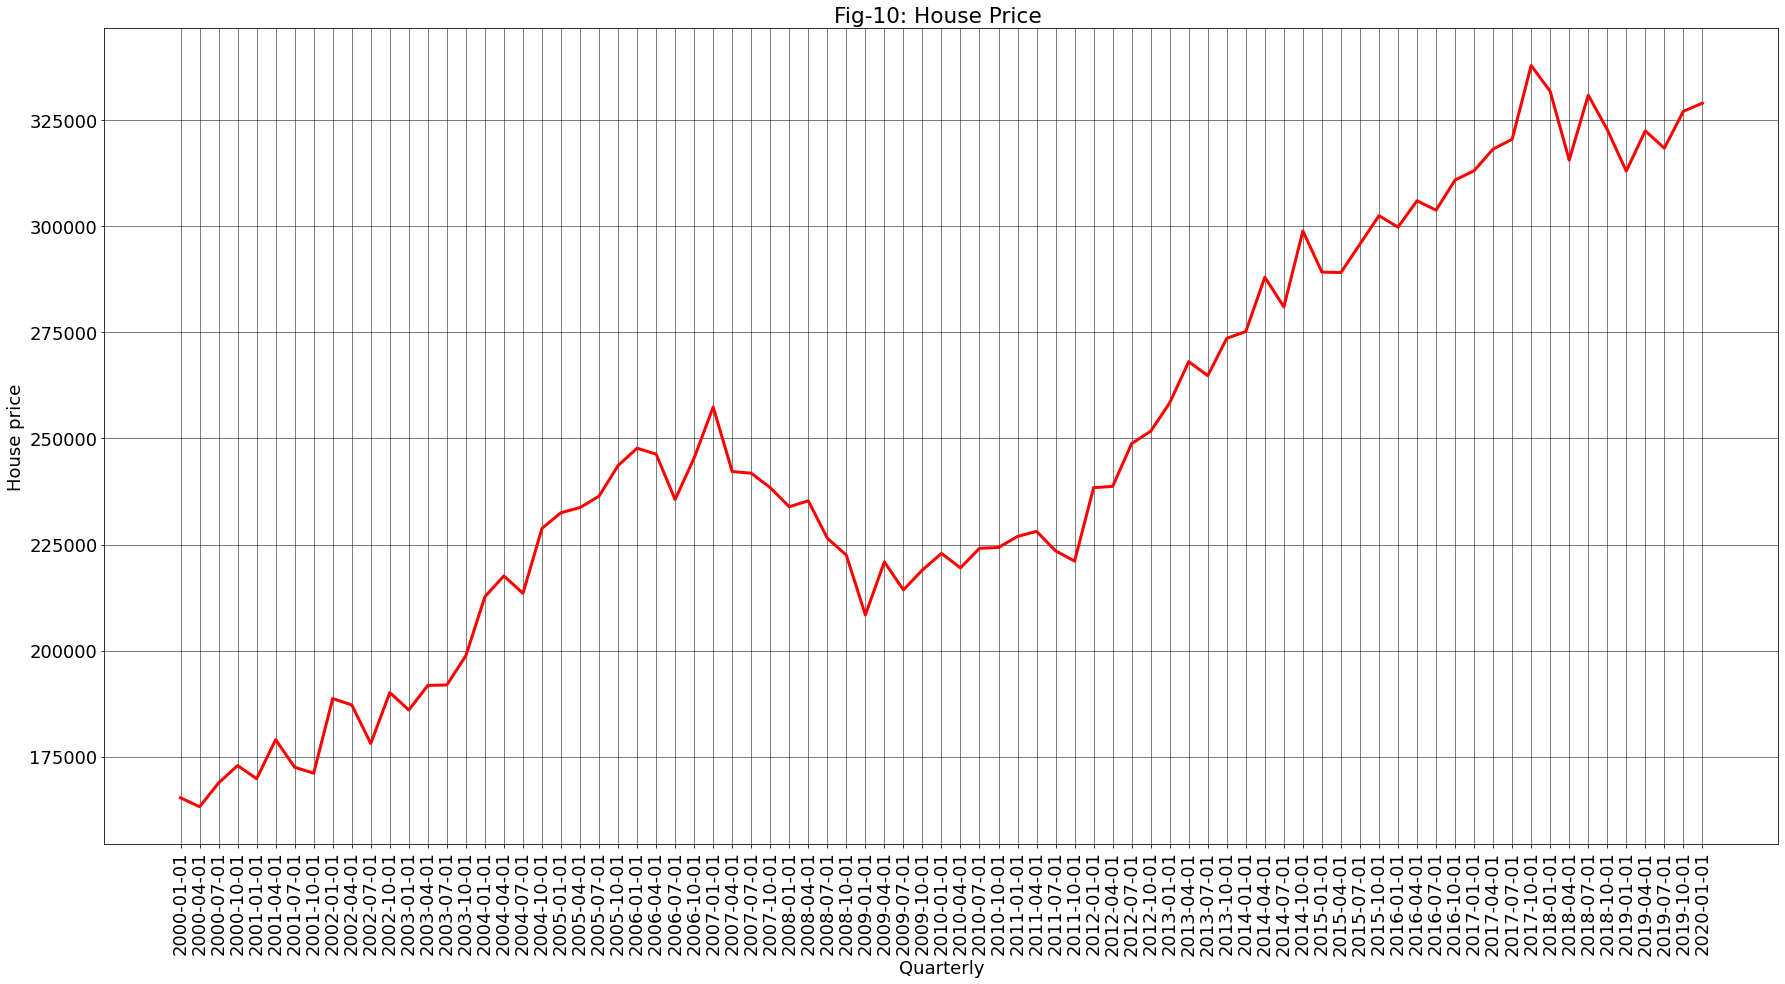

In [29]:
#HPI(house price index) plot
x=House_price_prediction['DATE']
y=House_price_prediction['House_price_inMIL']
plt.plot(x,y,color='red', linewidth=3)
plt.title('Fig-10: House Price ', fontdict=None, loc='center')
plt.xlabel('Quarterly')
plt.ylabel('House price')
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams.update({'font.size': 15})
plt.grid(color = 'black', linewidth = 0.5)
plt.show()

Fig-10 House prices are slightly down after recession period, demand is going up over years

### Factors analysis
During US recession factors that faced drastic fall
1. Income rate[Fig-3]
2. House supply[Fig-4]
3. Employment rates[Fig-6]
4. Fuel prices[Fig-7]
5. Business inventories[Fig-8]

Factors that gained during recession
1. Rental rate[Fig-5] more people rented during recession

Mortgage rates[Fig-2] are decresed and Interest rates[Fig-1] are stable more people starting buying houses which increased house price index(HPI)[Fig-9], and decrese in renting rates[Fig-5] since house supply[Fig-4](inventory levels) are stable demand for houses started increasing and thus leadin to increases in House prices[Fig-10]



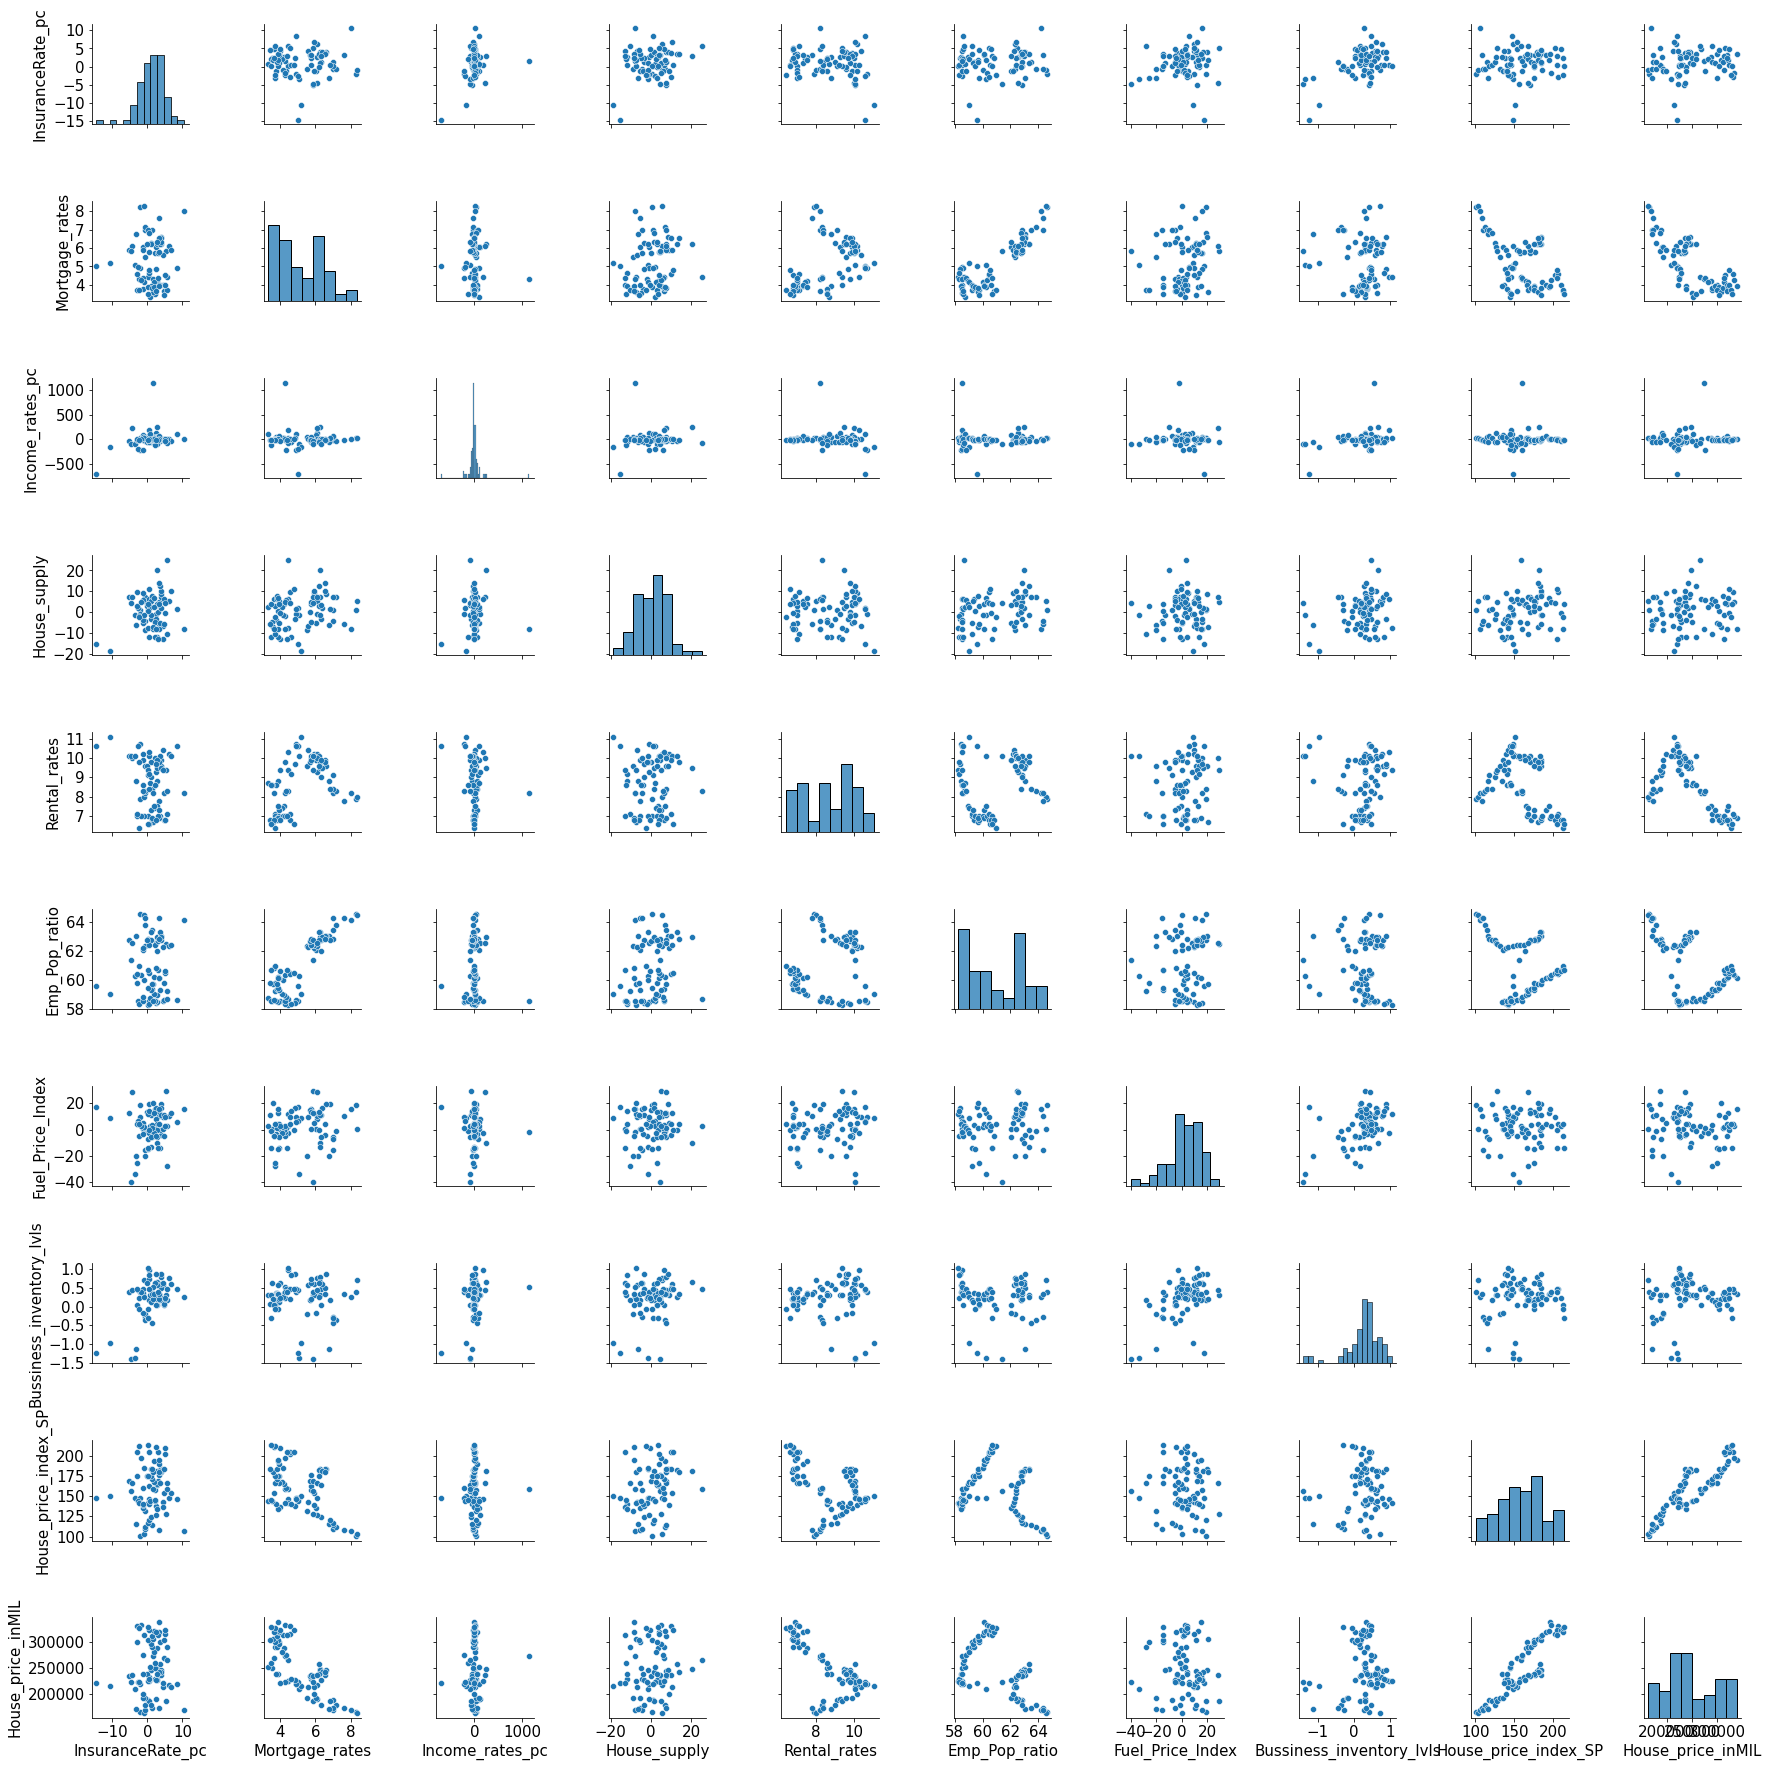

In [30]:
sn.pairplot(House_price_prediction)
plt.rcParams.update({'font.size': 8})
plt.show()

In [31]:
House_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      81 non-null     object 
 1   InsuranceRate_pc          81 non-null     float64
 2   Mortgage_rates            81 non-null     float64
 3   Income_rates_pc           81 non-null     float64
 4   House_supply              81 non-null     float64
 5   Rental_rates              81 non-null     float64
 6   Emp_Pop_ratio             81 non-null     float64
 7   Fuel_Price_Index          81 non-null     float64
 8   Bussiness_inventory_lvls  81 non-null     float64
 9   House_price_index_SP      81 non-null     float64
 10  House_price_inMIL         81 non-null     float64
dtypes: float64(10), object(1)
memory usage: 7.6+ KB


In [33]:
from google.colab import files
House_price_prediction.to_csv('HPP.csv',index=False)
files.download('HPP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame is downloaded to for further uses as House price prediction instead of importing 9 different datasets and merging them.

Note: House price prediction were done in different file

ThankYou